In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from random import *

In [3]:
data_train = pd.read_csv('./data/fashion-mnist_train.csv', header = 0)
data_train.head()
# print(data_train.shape)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# thay đổi shape của labels bằng reshape
# 60000 giá trị từ 0-9
# tensorflow yêu cầu labels là 1 vector 2 chiều
# labels = data_train['label'].values.reshape(1, 60000)
# tập train có 60000 ảnh 28x28=784 pixels
train = data_train.drop('label', axis=1)
# print(labels.shape)

# đưa giá trị pixels về 0-1 bằng cách chia cho 255 để giảm độ lớn của giá trị
train = np.array(train / 255.0)
print(train.shape)

(60000, 784)


In [5]:
from sklearn.model_selection import  train_test_split

In [41]:
X = train
labels = data_train['label']
labels_ = np.zeros((60000, 10))
labels_[np.arange(60000), labels] = 1
y = labels_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(48000, 784) (6000, 784) (6000, 784)
(48000, 10) (6000, 10) (6000, 10)


In [42]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.2218 - accuracy: 0.9158 - val_loss: 0.3260 - val_accuracy: 0.8863
Epoch 2/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.2126 - accuracy: 0.9180 - val_loss: 0.3239 - val_accuracy: 0.8877
Epoch 3/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.2077 - accuracy: 0.9202 - val_loss: 0.3395 - val_accuracy: 0.8807
Epoch 4/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.2001 - accuracy: 0.9243 - val_loss: 0.3408 - val_accuracy: 0.8845
Epoch 5/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.1907 - accuracy: 0.9283 - val_loss: 0.3325 - val_accuracy: 0.8928
Epoch 6/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.1824 - accuracy: 0.9308 - val_loss: 0.3686 - val_accuracy: 0.8918
Epoch 7/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.1784 - accuracy: 0.9332 - val_loss: 0.3491 - val_accuracy:

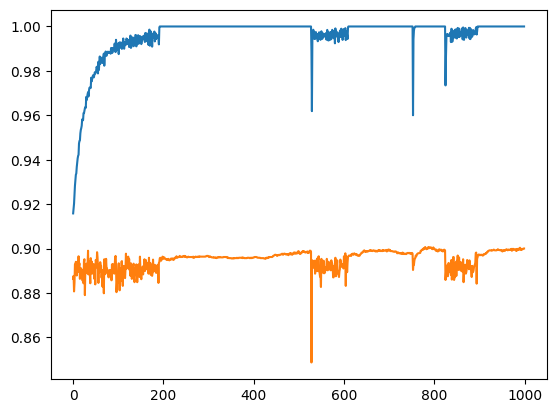

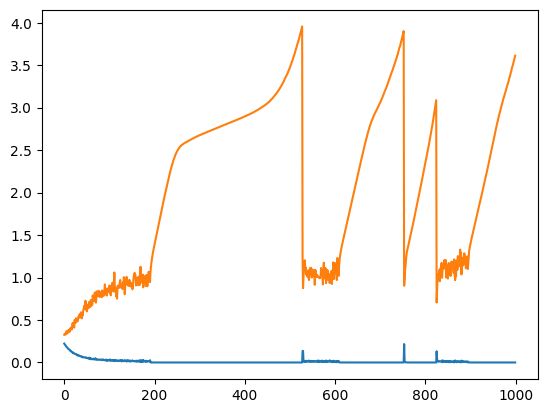

In [44]:
model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_val, y_val))

import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

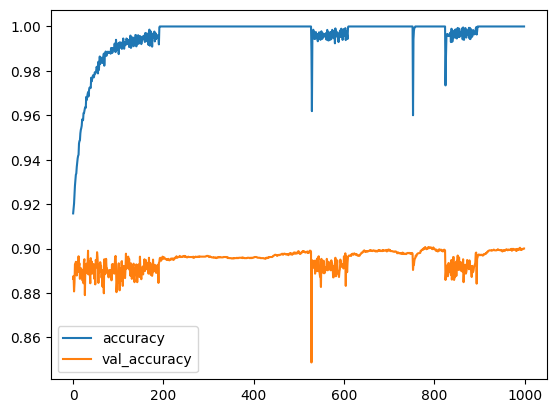

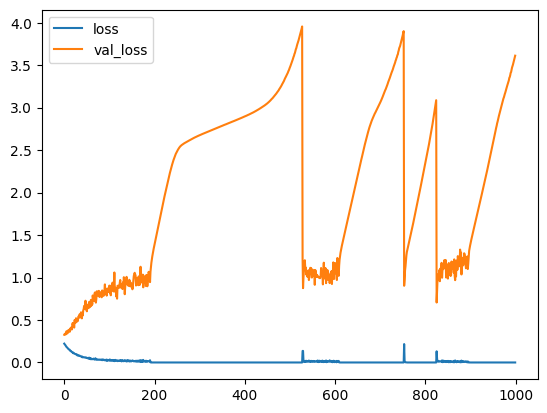

In [46]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
model.save("model_keras.h5")